## VIII.11.3 Исследуйте поведение фазовых траекторий для системы ОДУ вблизи особых точек (1, 0) - (-1, 0)
$$
    x' = y \\ 
    y' = x^2 -1
$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

### Метод Рунге-Кутты

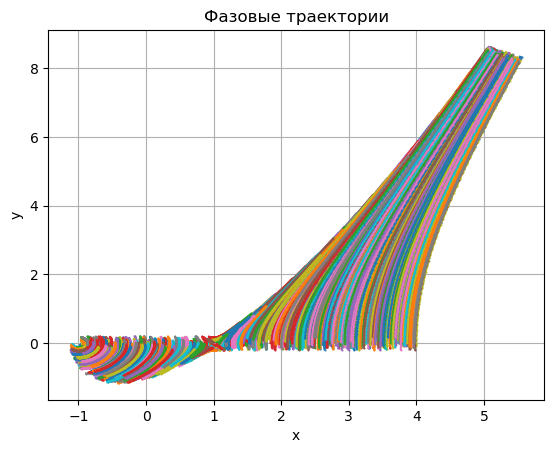

In [16]:
def f(U):
    return [U[1], U[0] * U[0] - 1]

def k(U, s, tau, A):
    if s <= 1:
        return f(U)

    k_arr = np.empty((s + 1, 2))
    k_arr[0] = f(U)

    for i in range(1, s + 1):
        U_new = np.copy(U)
        for j in range(i):
            U_new += tau * A[i - 1][j] * k_arr[j]
        k_arr[i] = f(U_new)

    return k_arr

def next_u(U, tau, b, k_arr):
    res = [0, 0]

    for i in range(len(b)):
        res += k_arr[i] * b[i] * tau

    return np.copy(U) + res


# init params
tau = 1e-2
rnd_size = 0.001

plot_radius = 100
u0 = [-1.0, 0.0]

A = np.zeros((3, 3))
A[0][0] = 0.5
A[1][1] = 0.5
A[2][2] = 1.0

b = np.array([1.0/6, 1.0/3, 1.0/3, 1.0/6])

# calculate points (800)
for point in range(800):
    u = [u0[0] + rnd_size * rnd.randrange(-5, 5000), u0[1] + rnd_size * rnd.randrange(-200, 200)]
    x_arr = np.array([u[0]])
    y_arr = np.array([u[1]])

    for t in range(0, 100):
        last_u = [x_arr[-1], y_arr[-1]]
        k_arr = k(last_u, 3, tau, A)
        res = next_u(last_u, tau, b, k_arr)
        if (res[0] * res[0] + res[1] * res[1]) > plot_radius:
            break
        x_arr = np.append(x_arr, res[0])
        y_arr = np.append(y_arr, res[1])

    plt.plot(x_arr, y_arr, '.-', ms=1)

plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Фазовые траектории")
plt.show()

In [14]:
?plt.plot

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

### Метод Адамса

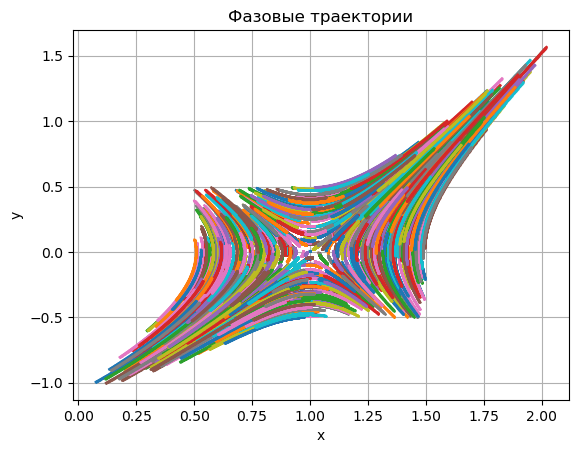

In [10]:
def f(U):
    return [U[1], U[0] * U[0] - 1]

def next_u_1(U, tau, f_arr):
    f_arr.append(f(U))
    return np.copy(U) + tau * (np.array(f_arr[-1]))

def next_u_2(U, tau, f_arr):
    f_arr.append(f(U))
    return np.copy(U) + tau * (3.0/2.0 * np.array(f_arr[-1]) - 1.0/2.0 * np.array(f_arr[-2]))

def next_u_3(U, tau, f_arr):
    f_arr.append(f(U))
    return np.copy(U) + tau * (23.0/12.0 * np.array(f_arr[-1]) - 16.0/12.0 * np.array(f_arr[-2]) + 5.0/12.0 * np.array(f_arr[-3]))


# init params
tau = 1e-3
rnd_size = 0.001

plot_radius = 100
u0 = [1.0, 0.0]

# calculate points
for point in range(800):
    f_arr = []
    u = [u0[0] + rnd_size * rnd.randrange(-500, 500), u0[1] + rnd_size * rnd.randrange(-500, 500)]
    x_arr = np.array([u[0]])
    y_arr = np.array([u[1]])

    last_u = u
    res = next_u_1(last_u, tau, f_arr)
    x_arr = np.append(x_arr, res[0])
    y_arr = np.append(y_arr, res[1])

    last_u = np.copy(res)
    res = next_u_2(last_u, tau, f_arr)
    x_arr = np.append(x_arr, res[0])
    y_arr = np.append(y_arr, res[1])

    for t in range(600):
        last_u = np.copy(res)
        res = next_u_3(last_u, tau, f_arr)
        if (res[0] * res[0] + res[1] * res[1]) > plot_radius:
            break
        x_arr = np.append(x_arr, res[0])
        y_arr = np.append(y_arr, res[1])

    plt.plot(x_arr, y_arr, '.-', ms=1)

plt.title("Фазовые траектории")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()

### Метод ФДН

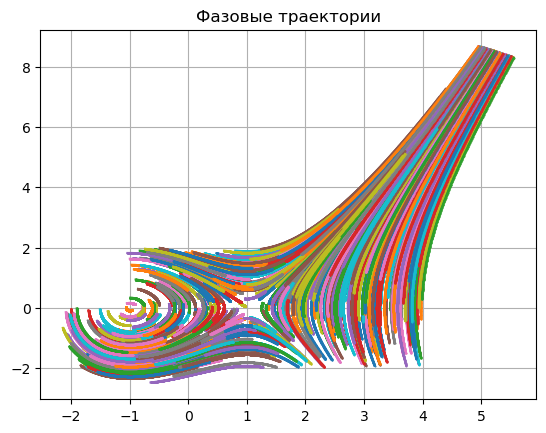

Text(0.5, 0, 'x')

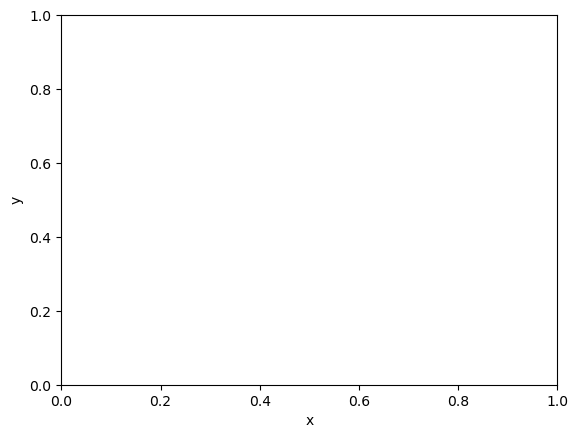

In [3]:
def back_diff(u_arr, p):
    if p == 1:
        return u_arr[-1] - u_arr[-2]
    return back_diff(u_arr, p - 1) - back_diff(u_arr[:-1], p - 1)

def num_diff_array(func, x, h, step) -> float:
    return (func(x + 3 * h) - func(x - 3 * h)) / 6.0 / step

def J(U, func):
    size = len(U)
    res = np.zeros((size, size))
    step = 1e-5
    h = np.zeros(size)

    for i in range(size):
        h[i] = step
        res[i] = num_diff_array(func, U, h, step)
        h[i] = 0

    return res

def f(U):
    return np.array([U[1], U[0] * U[0] - 1])

def next_u_1(U, tau):
    return np.copy(U) + tau * (np.array(f(U)))

def next_u_2(U, tau, u_arr):
    return np.copy(U) + tau * (3.0/2.0 * f(u_arr[-1]) - 1.0/2.0 * f(u_arr[-2]))

def next_u_3(U, tau, u_arr):
    return np.copy(U) + tau * (23.0/12.0 * f(U) - 16.0/12.0 * f(u_arr[-1]) + 5.0/12.0 * f(u_arr[-2]))

def fdn_next_u(alpha_arr, beta, tau, func, u_arr):
    u_last = u_arr[-1]
    delta = (alpha_arr[2] * u_last + alpha_arr[1] * u_arr[-2] + alpha_arr[0] * u_arr[-3])
    gamma = tau * beta
    u_new = gamma * f(u_last) + delta

    while (np.linalg.norm(u_last - u_new) > 1e-4):
        u_last = u_new
        u_new = gamma * f(u_last) + delta

    return u_new

# init params
tau = 1e-3
rnd_size = 0.01

plot_radius = 100
u0 = [-1.0, 0.0]

alpha_arr = [2.0/11.0, -9.0/11.0, 18.0/11.0]
beta = 6.0/11.0

# plotting points
for point in range(600):
    u = [u0[0] + rnd_size * rnd.randrange(-5, 500), u0[1] + rnd_size * rnd.randrange(-200, 200)]
    u_arr = [u]

    last_u = u
    res = next_u_1(last_u, tau)
    u_arr.append(res)

    last_u = np.copy(res)
    res = next_u_2(last_u, tau, u_arr)
    u_arr.append(res)

    last_u = np.copy(res)
    res = next_u_3(last_u, tau, u_arr)
    u_arr.append(res)

    for t in range(900):
        res = fdn_next_u(alpha_arr, beta, tau, f, u_arr)
        if (res[0] * res[0] + res[1] * res[1]) > plot_radius:
            break
        u_arr.append(res)

    x_arr, y_arr = zip(*u_arr)
    plt.plot(x_arr, y_arr, '.-', ms=1)

plt.grid()
plt.title("Фазовые траектории")
plt.show()
plt.ylabel("y")
plt.xlabel("x")
